In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

In [14]:
import seaborn
seaborn.set(rc={'axes.facecolor':'fdfaf6', 'figure.facecolor':'fdfaf6'})

In [2]:
df_f1 = pd.read_csv('csv/f1_results.csv')
df_human = pd.read_csv('csv/human_results2.csv')
df_blaser = pd.read_csv('csv/blaser_results.csv')

In [3]:
custom_palette = {'dark_blue': '#0f1646', 'light_blue': '#aac3e8', 'blue': '#1f2c8f','background':'fdfaf6'}

palette = [custom_palette[color] for color in custom_palette]

In [9]:

df_human['inverted_score'] = df_human.apply(lambda row: max(100 - row['score'], 0), axis=1)
df_human['normalized_score'] = (df_human['inverted_score'] - df_human['inverted_score'].min()) / (df_human['inverted_score'].max() - df_human['inverted_score'].min())

# Merge the dataframes for correlation purposes
df_merged = pd.merge(df_f1, df_human, on=['file', 'lg', 'model'])

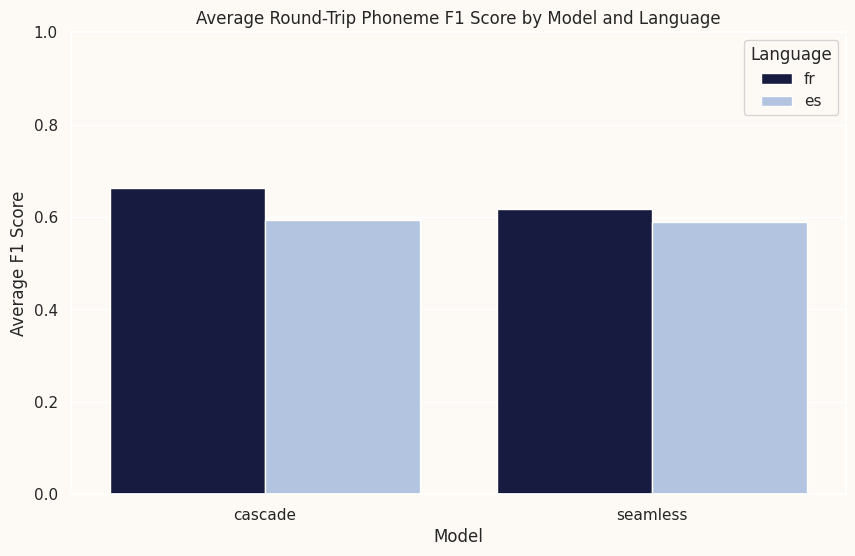

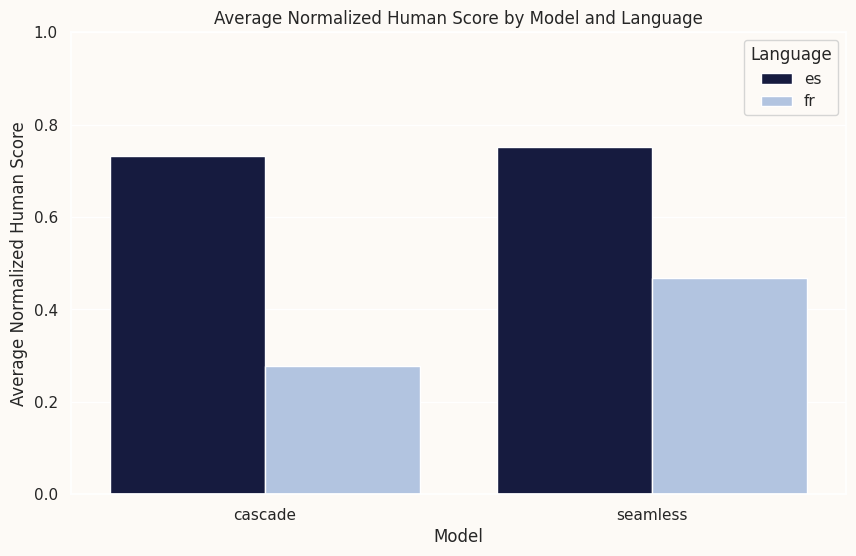

In [15]:
# Plot 1: Average round-trip phoneme F1 score for each model/language (df_f1)
plt.figure(figsize=(10, 6))
sns.barplot(data=df_f1, x='model', y='f1_score', hue='lg', errorbar=None, palette=palette)
plt.title('Average Round-Trip Phoneme F1 Score by Model and Language')
plt.xlabel('Model')
plt.ylabel('Average F1 Score')
plt.ylim(0, 1)
plt.legend(title='Language')
plt.show()

# Plot 2: Average normalized human score for each model/language (df_human)
plt.figure(figsize=(10, 6))
sns.barplot(data=df_human, x='model', y='normalized_score', hue='lg', errorbar=None, palette=palette)
plt.title('Average Normalized Human Score by Model and Language')
plt.xlabel('Model')
plt.ylabel('Average Normalized Human Score')
plt.ylim(0, 1)
plt.legend(title='Language')
plt.show()


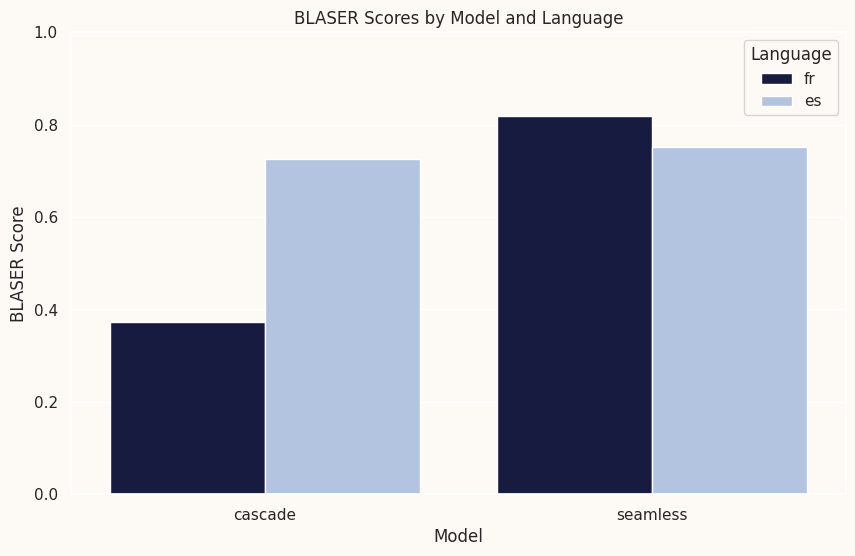

In [16]:
# Plot 3: BLASER Scores by Model and Language
plt.figure(figsize=(10, 6))
sns.barplot(data=df_blaser, x='model', y='unsupervised_scores', hue='lg', palette=palette)
plt.title('BLASER Scores by Model and Language')
plt.xlabel('Model')
plt.ylabel('BLASER Score')
plt.ylim(0, 1)
plt.legend(title='Language')
plt.show()

/tmp/ipykernel_166/1526621168.py:4: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.scatterplot(data=df_merged, x='normalized_score', y='f1_score', hue='lg', style='model', palette=palette, s=100)


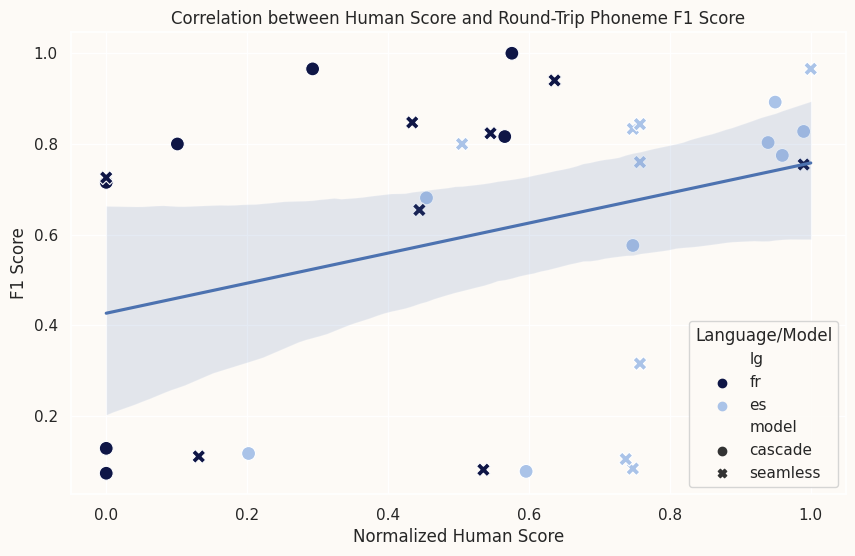

In [17]:
plt.figure(figsize=(10, 6))

# Use hue for one category and style for another
sns.scatterplot(data=df_merged, x='normalized_score', y='f1_score', hue='lg', style='model', palette=palette, s=100)

# Add a regression line
sns.regplot(data=df_merged, x='normalized_score', y='f1_score', scatter=False)

# Improve the plot aesthetics
plt.title('Correlation between Human Score and Round-Trip Phoneme F1 Score')
plt.xlabel('Normalized Human Score')
plt.ylabel('F1 Score')
plt.legend(title='Language/Model')
plt.grid(True)
plt.show()